In [ ]:
#Libraries
import sklearn

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.python import train
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.metrics import silhouette_score
from sklearn.decomposition import TruncatedSVD


#data
image_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = image_data.load_data()



4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#processing Data and understadning the format and size
x = train_images.shape

y = len(train_labels)

z = test_images.shape
print("Lables:",y)
print("Data:",x)
print("Test Labels:",z)

Lables: 60000
Data: (60000, 28, 28)
Test Labels: (10000, 28, 28)


60,000 lables in the set
provided with 10,000 images and images
represented in pixels of 28x28


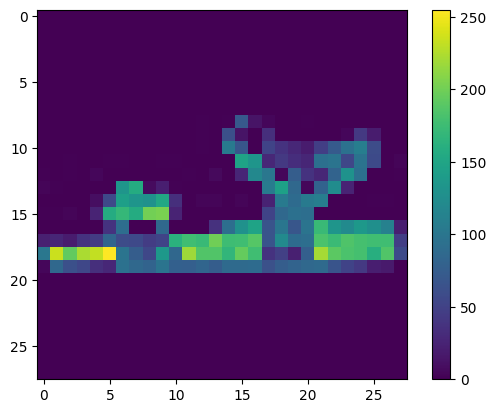

In [ ]:
#Process of visualising the Data to understand what we are working with

plt.figure()
plt.imshow(train_images[59999])
plt.colorbar()
plt.grid(False)
plt.show()


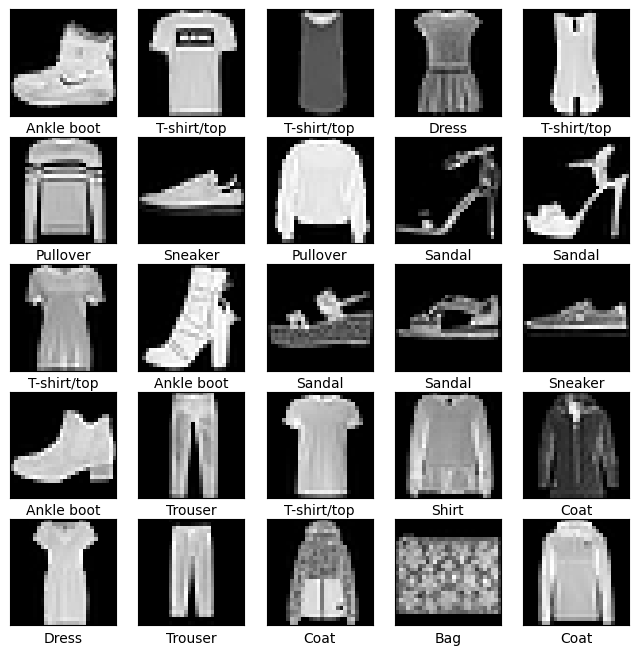

In [ ]:
#labeled each of the class based on the information received and diaplayed 25 differnet clothing items

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])

plt.show()



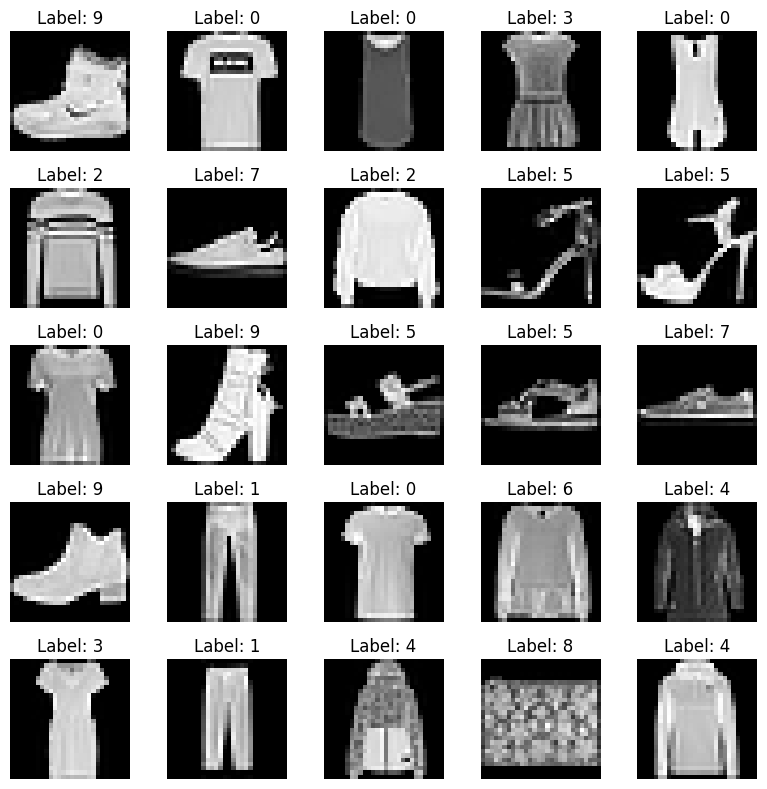

In [ ]:
# Plot a few sample images based on labels to confirm the data is being processed correctly
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Label: {train_labels[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

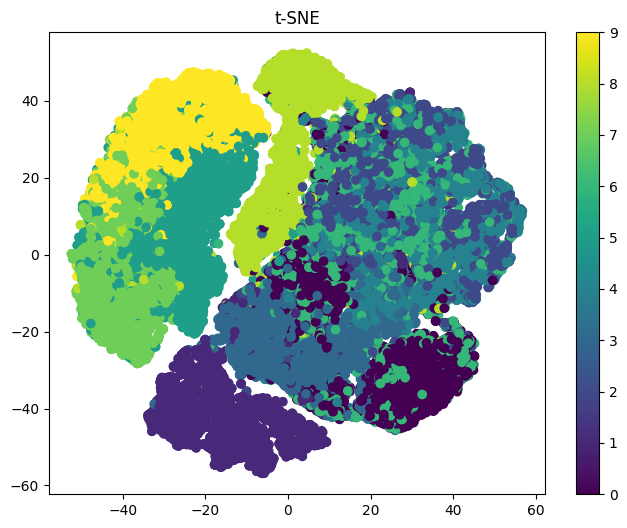

In [ ]:
#Load Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images_reshape = train_images.reshape(train_images.shape[0], -1)/255.0

#t-SNE Model
tsne = TSNE(n_components=2, random_state=42)
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, early_exaggeration=12, random_state=42)

#Fit and transform the data using t-SNE
train_images_tsne = tsne.fit_transform(train_images_reshape)


#t-SNE Plot displayed
plt.figure(figsize=(8, 6))
plt.scatter(train_images_tsne[:, 0], train_images_tsne[:, 1], c=train_labels, cmap="viridis")
plt.colorbar()
plt.title("t-SNE")
plt.show()

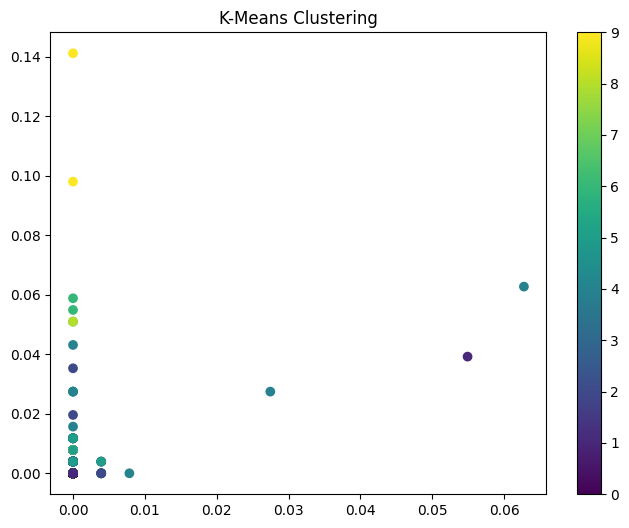

In [ ]:
#K Means

#Load dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
data = train_images.reshape(train_images.shape[0], -1)/255.0

#Apply K-Means clustering with tunable parameters
kmeans = KMeans(n_clusters=10, n_init = 35, random_state=42)
train_kmeans = kmeans.fit_predict(data)

#Create a scatter plot of the K-Means clustering results
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=train_kmeans, cmap="viridis")
plt.colorbar()
plt.title("K-Means Clustering")
plt.show()

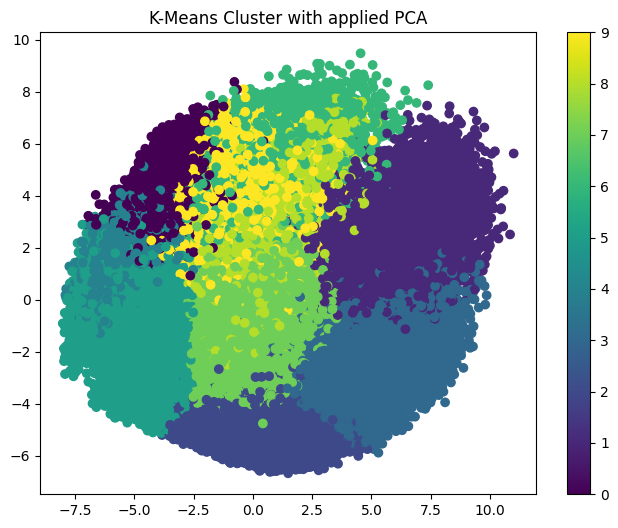

In [ ]:
#K-Means with applied PCA
image_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = image_data.load_data()
data = train_images.reshape(train_images.shape[0], -1)/255.0

#PCA - a reduction techniique used to convert large volumes of data to lower data sets while maintaining the most amount of data variance ()
pca = PCA(n_components=10)
pca_data = pca.fit_transform(data)

#K-Means Clustering
kmeans = KMeans(n_clusters=10, n_init=50, random_state=42)
train_kmeans = kmeans.fit_predict(pca_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=train_kmeans, cmap="viridis")
plt.colorbar()
plt.title("K-Means Cluster with applied PCA")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


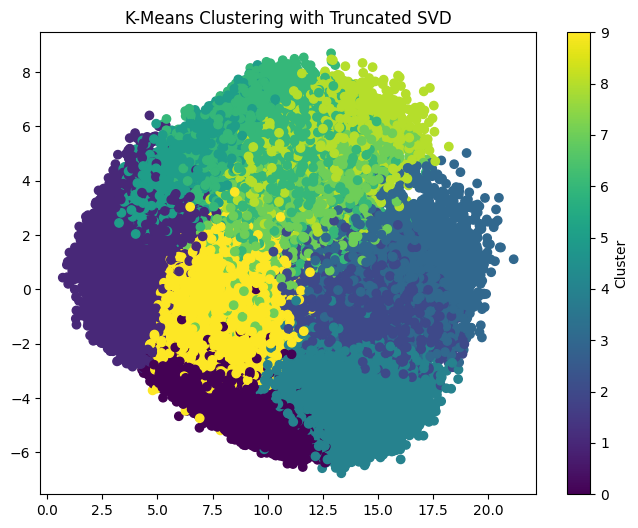

In [ ]:
#load data set
(train_images, train_labels), (test_images, test_labels) = image_data.load_data()
data = train_images.reshape(train_images.shape[0], -1)/255.0

#Apply Truncated Singular Value Decomposition
svd = TruncatedSVD(n_components= 50, random_state=42)
data_svd = svd.fit_transform(data)

#KMeans clustering 10 to reduce data collected from T-SVD
kmeans = KMeans(n_clusters=10, random_state=42)
t_kmeans = kmeans.fit_predict(data_svd)

plt.figure(figsize=(8, 6))
plt.scatter(data_svd[:, 0], data_svd[:, 1], c=t_kmeans, cmap="viridis")
plt.colorbar(label="Cluster")
plt.title("K-Means Clustering with Truncated SVD")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


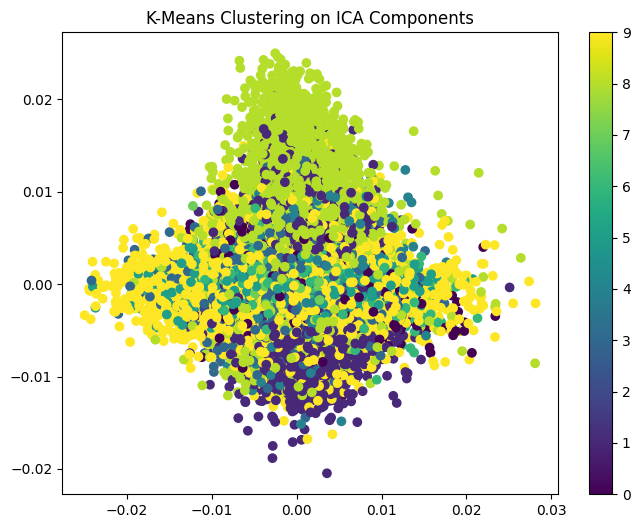

In [ ]:
#Load
(train_images, train_labels), _ = tf.keras.datasets.fashion_mnist.load_data()
data = train_images.reshape(train_images.shape[0], -1) / 255.0

#Apply Independent Component Analysis
ica = FastICA(n_components=50, random_state=42)
data_ica = ica.fit_transform(data)

#Apply K-Means clustering on the independent components
kmeans = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans.fit_predict(data_ica)

#Create a scatter plot of the K-Means clustering results
plt.figure(figsize=(8, 6))
plt.scatter(data_ica[:, 0], data_ica[:, 1], c=cluster_labels, cmap="viridis")
plt.colorbar()
plt.title("K-Means Clustering on ICA Components")
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score

davies_bouldin_avg = davies_bouldin_score(pca_data, train_kmeans)
print(f"Davies-Bouldin Index for K-means clustering with applied PCA: {davies_bouldin_avg}")

davies_bouldin_avg = davies_bouldin_score(data_svd, t_kmeans)
print(f"Davies-Bouldin Index for K-means clustering with Truncated SVD: {davies_bouldin_avg}")

davies_bouldin_avg = davies_bouldin_score(data_ica, cluster_labels)
print(f"Davies-Bouldin Index for K-means clustering on ICA components:  {davies_bouldin_avg}")

davies_bouldin_avg = davies_bouldin_score(data, train_kmeans)
print(f"Davies-Bouldin Index for K-means clustering: {davies_bouldin_avg}")

davies_bouldin_avg = davies_bouldin_score(train_images_tsne, train_labels)
print(f"Davies-Bouldin Index for t-SNE: {davies_bouldin_avg}")

#Based on provided Davies-Bouldin Index and the applied clustering methods,"K-means clustering with applied PCA" is the
#most accurate and effecient with the clusters displayed. while the data is reduced it still hold the most amount of important
#variance in which helps with analyzing. the second best would be "K-means clustering with Truncated SVD" as it shows and displays
#the lables are visibly separated while retaining as much data


Davies-Bouldin Index for K-means clustering with applied PCA: 1.1274784409448304
Davies-Bouldin Index for K-means clustering with Truncated SVD: 1.6346963339526543
Davies-Bouldin Index for K-means clustering on ICA components:  3.738684237846479
Davies-Bouldin Index for K-means clustering: 1.8149903271785468
Davies-Bouldin Index for t-SNE: 2.117418052930022
